

# Project: Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset TMDb Movies data used in these analysis are details showing 10,000 films collected from TMDb Movie Database. Budget, revenue, released year and some others are some basic data for the analysis.

Below are information supplied by each released film:

1.Film Title

2.Casts

3.Director

4.Genre

5.overview

6.Popularity

7.Releasde date/Year

8.Production company

9.Budget

10.Revenue

11.Rating/vote




### Question(s) for Analysis
•	 What are the movies with Revenue above 3 million whose Budget less than 1 million

•	Which year has the highest Movie release?



 


 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline




<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Loading tmdb-movies.csv
df = pd.read_csv('tmdb-movies.csv')

In [3]:
#viewing the top 5 dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
#Shape of TMDb data
df.shape

(10866, 21)

In [5]:
# More information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#identify blank rows
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Identifying columns with with null values
df.isna().any().value_counts()

False    12
True      9
dtype: int64

About 9 features from the dataset can be said to have more than one blank rows with homepage having the most.


### Data Cleaning
Rows in the dataframe with null values can be discarded safely.
Such as:

1.Genre(23)these are movies that do not belong to any category of movies

2.Director(44)these are movies with no proper cordinations or supervision

3.cast(76)these are movies without casting

Remove duplicates

Remove "id" and 'imdb_id" columns and ignore columns not necessary for analysis such as "homepage", "overview"

 

Disregard movies without Genre,Director and Cast

In [8]:
df.dropna(subset=['genres','director','cast'],inplace=True)

Investigating duplicates

In [9]:
df[df.iloc[:,:2].duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


Removing duplicates and unnecessary columns

In [10]:
#Removing duplicates
df.drop_duplicates(subset=['id','imdb_id'],inplace=True)

In [11]:
#After removing duplicates
df.iloc[:,:2].duplicated().any()

False

In [12]:
#Removing columns not needed for analysis
df.drop(columns=['id', 'imdb_id', 'homepage', 'overview'], inplace=True)

In [13]:
df.shape

(10731, 17)

Data info after cleaning

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10731 entries, 0 to 10865
Data columns (total 17 columns):
popularity              10731 non-null float64
budget                  10731 non-null int64
revenue                 10731 non-null int64
original_title          10731 non-null object
cast                    10731 non-null object
director                10731 non-null object
tagline                 8001 non-null object
keywords                9306 non-null object
runtime                 10731 non-null int64
genres                  10731 non-null object
production_companies    9772 non-null object
release_date            10731 non-null object
vote_count              10731 non-null int64
vote_average            10731 non-null float64
release_year            10731 non-null int64
budget_adj              10731 non-null float64
revenue_adj             10731 non-null float64
dtypes: float64(4), int64(5), object(8)
memory usage: 1.5+ MB


In [15]:
#replace missing words in "keywords" and 'tagline'columns 
df.fillna(method='ffill', inplace=True)

In [16]:
#NA Check
df.isna().sum()

popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
tagline                 0
keywords                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [17]:
df.head()

,popularity,budget,revenue,original_title,cast,director,tagline,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [18]:
#Data shape after cleaning
df.shape

(10731, 17)

In [19]:
#Replacing all zero occurences with the mean value
df.replace(0,df.mean(axis=0),inplace=True)

# <a id='eda'></a>
## Exploratory Data Analysis

##Summary Statistics of Dataset



In [20]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10731.000000,1.073100e+04,1.073100e+04,10731.000000,10731.000000,10731.000000,10731.000000,1.073100e+04,1.073100e+04
mean,0.652615,2.249862e+07,6.244304e+07,102.736197,219.812972,5.964710,2001.259622,2.699975e+07,8.054156e+07
std,1.004804,2.814008e+07,1.116267e+08,30.040062,578.815324,0.930283,12.820151,3.063617e+07,1.372952e+08
min,0.000188,1.000000e+00,2.000000e+00,3.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,0.210765,1.480365e+07,4.024287e+07,90.000000,17.000000,5.400000,1995.000000,1.776530e+07,5.200623e+07
50%,0.387081,1.480365e+07,4.031989e+07,99.000000,39.000000,6.000000,2006.000000,1.776530e+07,5.200623e+07
75%,0.720889,1.600000e+07,4.031989e+07,112.000000,148.000000,6.600000,2011.000000,2.110885e+07,5.200623e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


The statistics above reveals:
   
  1.Popularity of movies ranges from 0.0001 to 32.99(lowest to highest)
  
  2.The movie with the highest budget was budgeted above 400 trillion with a mean average of over 20 trillion
    
  3.The Movie with the highest rateing(votes)and the lowest rating(votes) was voted at 9767 and 10 respectively.
  
  4.the movie with the highest Revenue recieved was over 2 quadrillion



### Research Question 1 (What are the movies with Revenue above 3 million whose Budget less than 1 million)

In [21]:
df = pd.read_csv('tmdb-movies.csv')
small_df = df[['original_title', 'release_date', 'budget', 'revenue', 'runtime']]
result = small_df[(small_df['revenue'] > 3000000) & (small_df['budget'] < 1000000)]
print("Movies, revenue more than 3 million and spent less than 1 million:")
print(result.head())


Movies, revenue more than 3 million and spent less than 1 million:
                             original_title release_date  budget    revenue  \
30                               Mr. Holmes      6/19/15       0   29355203   
36                                   Solace       9/3/15       0   22354572   
95   Alvin and the Chipmunks: The Road Chip     12/17/15       0  233755553   
113                                    Dope      6/19/15  700000   17986781   
119                     Absolutely Anything      6/26/15       0    5189646   

     runtime  
30       103  
36       101  
95        92  
113      103  
119       85  


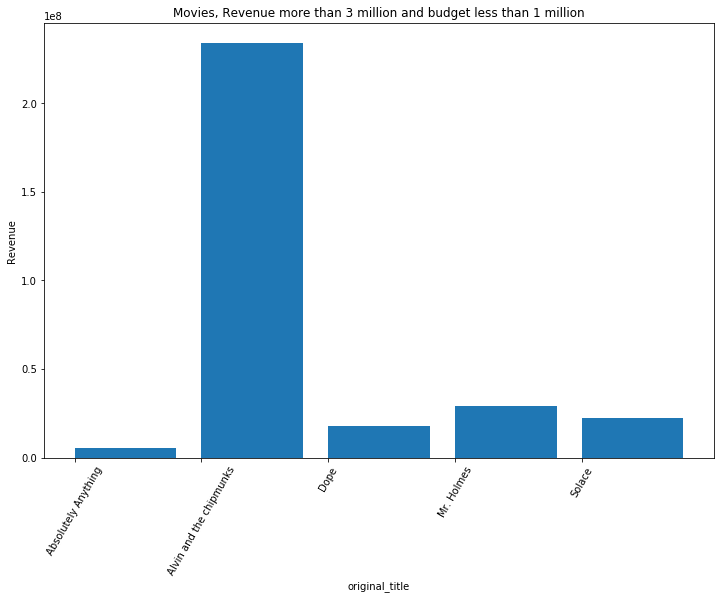

In [22]:
#preparing data for plot
Original_title=['Mr. Holmes', 'Solace', 'Alvin and the chipmunks', 'Dope', 'Absolutely Anything']
Revenue=[29355203,22354572,233755553,17986781,5189646]
Budget=[0,0,0,700000,0]

#creating a bar chart with parameters
ax = plt.subplots(figsize=(12, 8))
plt.bar (Original_title, Revenue, bottom=50, align='edge')


plt.title('Movies, Revenue more than 3 million and budget less than 1 million')
plt.xlabel('original_title')
plt.ylabel('Revenue',)
plt.xticks(rotation=60);
plt.show()



Alvin and the chipmunks made the highest Revenue of 23,3755,553 among the movies with revenue higher than 3 million and budget less than 1 million whilst Absolutely nothing had a revenue of  5,189,646 million and budget less than 1 million. 

### Research Question 2 (Which year has the highest Movie release )

In [23]:
# Count of movies release yearly, by runtime.
most_release_year = df.groupby('release_year').count()['runtime'] 


### Top 10 Years with highest movie release

In [24]:
yearly_movie_release = most_release_year.sort_values(ascending=False)

yearly_movie_release.head(10) 

release_year
2014    700
2013    659
2015    629
2012    588
2011    540
2009    533
2008    496
2010    490
2007    438
2006    408
Name: runtime, dtype: int64

In [25]:
def ym_release_visuals(data: pd.Series, title: str = 'Yearly movies released'):
    """
        Yearly movies released visuals

    """
    fig, ax = plt.subplots(figsize=(12, 8))
    data.plot.bar(ax=ax)
    plt.xlabel('Year')
    plt.ylabel('Released Movies')
    plt.title(title)

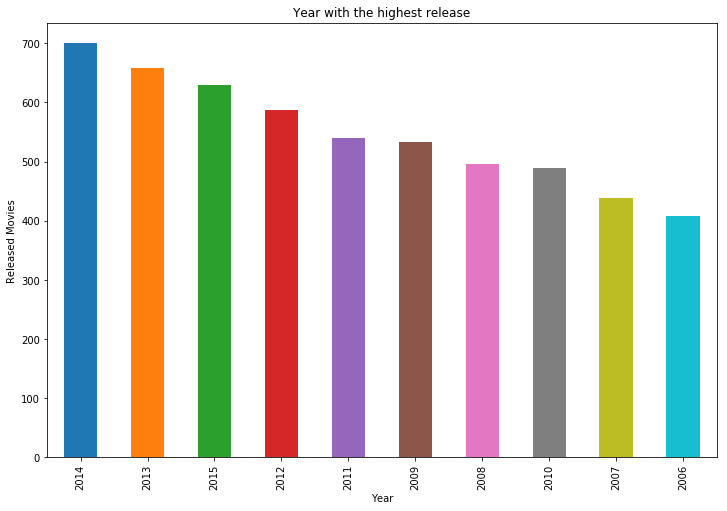

In [26]:
# Year with highest release
ym_release_visuals(yearly_movie_release.head(10),
                     title="Year with the highest release")


As shown in the figure above there has been a consistent increase of released movies as the year increases for the past 10 years up to 2014.

2014 has the highest movie release with about 700 released movies.


In [27]:
#calculating for the frequency distribution of the revenue using the mean, SD and the Total count of movies
x=np.random.normal(6.244304e+07, 11, 10731)
print(x)




[ 62443056.6783858   62443040.02759475  62443032.43977316 ...,
  62443032.44423522  62443013.81305297  62443049.42767103]


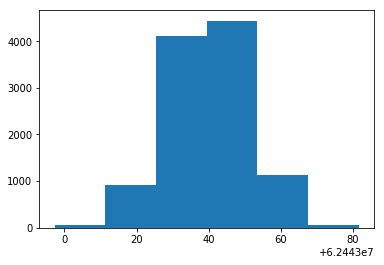

In [28]:
# ploting a histogram for the result

plt.hist(x, bins=6)
plt.show()


In [29]:
# checking the frequency of movie release using the mean, SD and Count of release_year
x=np.random.normal(2001.259622	, 12, 10731)
print(x)

[ 2001.69332259  2012.58305672  1978.30651697 ...,  1994.92031281
  2003.12133213  2015.76430061]


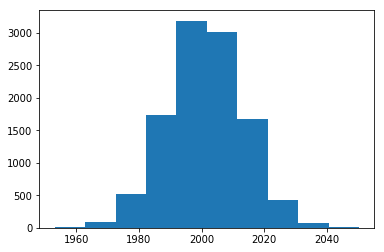

In [30]:
plt.hist(x)
plt.show()

Analysis above shows the frequency of movies released 

About:
1. 200 movies was released between 1960-1970,

2. 400 from 1970-1980,

3. 1400 from 1980-1990

4. 2800 from 1990-2000

5. 3400 from 2000-2019

6. 2000 from 2019-2020 and 

7. about 900 from 2020-2040


<a id='conclusions'></a>
## Conclusions


The general analysis shows that the Popularity of movies in the dataset ranges from 0.0001(min) to 32.99(Max) with a mean average of 0.652615, and the movie with the highest budget was budgeted above 400 trillion(Max) and the movie with the lowest was budgeted at about  million (Min) with the total budget having a mean average of over 20 trillion.

The Movies which returned the highest revenue received about 2 quadrillion and was released in 2015 having a runtime of 900 min and a total vote count(rating) of 9767 being Movie with the highest rateing(votes), the movie with the lowest rating(votes) was rated with 10 votes.



As show in fig 1 above, Alvin and the chipmunks with a Revenue of 233,755,553 million in 2015 was top of the movies with revenue above 3 million and  budget less 1 million, whilst Absolutely nothing made the least revenue among the list with 5,189,646 and budget less than 1 million

Analysis from Fig 2 above also shows that More movies are being released today than in the past due to increased movie popularity,  the analysis shows that there has been a consistent increase of released movies as the year increases for the past 10 years up to 2014.

2014 has been the year with the highest movie release with about 700 released movies.



## Project Limitation


In carrying out this project i had the challenge of limited amount of time to carry out the project due to other pressing engagement.

There were other limitations of some other resources required for the project which included acess to and the speed of internet.

  


### Reference

https://codingnomads.co/blog/data-analysis-example.© 2016-2020 CodingNomads LLC

 https://pythonguides.com/author/fewlines4biju/ © 2022 Python Guides

In [31]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0